Project 2: FIFA World Cup Analysis

Import necessary modules

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


Load all DataFiles

In [3]:
matches = pd.read_csv('WorldCupMatches.csv')
players = pd.read_csv('WorldCupPlayers.csv')
worldcups = pd.read_csv('WorldCups.csv')

In [4]:
worldcups['GoalsScored'] = worldcups['GoalsScored'].astype(str).str.replace('.', '').str.replace(',', '').astype(int)
worldcups['QualifiedTeams'] = worldcups['QualifiedTeams'].astype(str).str.replace('.', '').str.replace(',', '').astype(int)
worldcups['MatchesPlayed'] = worldcups['MatchesPlayed'].astype(str).str.replace('.', '').str.replace(',', '').astype(int)
worldcups['Attendance'] = worldcups['Attendance'].astype(str).str.replace('.', '').str.replace(',', '').astype(int)


Handle missing values in the DataSet


In [5]:

print("WorldCups Dataset Missing Values:")
print(worldcups.isnull().sum())
print("\nWorldCupMatches Dataset Missing Values:")
print(matches.isnull().sum())
print("\nWorldCupPlayers Dataset Missing Values:")
print(players.isnull().sum())


WorldCups Dataset Missing Values:
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

WorldCupMatches Dataset Missing Values:
Year                    3720
Datetime                3720
Stage                   3720
Stadium                 3720
City                    3720
Home Team Name          3720
Home Team Goals         3720
Away Team Goals         3720
Away Team Name          3720
Win conditions          3720
Attendance              3722
Half-time Home Goals    3720
Half-time Away Goals    3720
Referee                 3720
Assistant 1             3720
Assistant 2             3720
RoundID                 3720
MatchID                 3720
Home Team Initials      3720
Away Team Initials      3720
dtype: int64

WorldCupPlayers Dataset Missing Values:
RoundID              0
MatchID              0
Team Initials        0
Coach Nam

In [6]:

worldcups.fillna(method='ffill', inplace=True)

matches.dropna(subset=['Home Team Name', 'Away Team Name'], inplace=True)  # Drop rows with missing team names
matches['Attendance'].fillna(matches['Attendance'].mean(), inplace=True)  # Fill missing attendance with mean

players.dropna(subset=['Player Name', 'Team Initials'], inplace=True)  # Drop rows with missing player names or team initials
players['Event'].fillna('None', inplace=True)  # Fill missing events with 'None'

C:\Users\anjan\AppData\Local\Temp\ipykernel_11324\3429674118.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  worldcups.fillna(method='ffill', inplace=True)


In [7]:
print("WorldCups Dataset Missing Values:")
print(worldcups.isnull().sum())
print("\nWorldCupMatches Dataset Missing Values:")
print(matches.isnull().sum())
print("\nWorldCupPlayers Dataset Missing Values:")
print(players.isnull().sum())

WorldCups Dataset Missing Values:
Year              0
Country           0
Winner            0
Runners-Up        0
Third             0
Fourth            0
GoalsScored       0
QualifiedTeams    0
MatchesPlayed     0
Attendance        0
dtype: int64

WorldCupMatches Dataset Missing Values:
Year                    0
Datetime                0
Stage                   0
Stadium                 0
City                    0
Home Team Name          0
Home Team Goals         0
Away Team Goals         0
Away Team Name          0
Win conditions          0
Attendance              0
Half-time Home Goals    0
Half-time Away Goals    0
Referee                 0
Assistant 1             0
Assistant 2             0
RoundID                 0
MatchID                 0
Home Team Initials      0
Away Team Initials      0
dtype: int64

WorldCupPlayers Dataset Missing Values:
RoundID              0
MatchID              0
Team Initials        0
Coach Name           0
Line-up              0
Shirt Number         0


Plots for WorldCups DataSet

In [8]:

sns.set(style="whitegrid")

 Goals Scored Over the Years

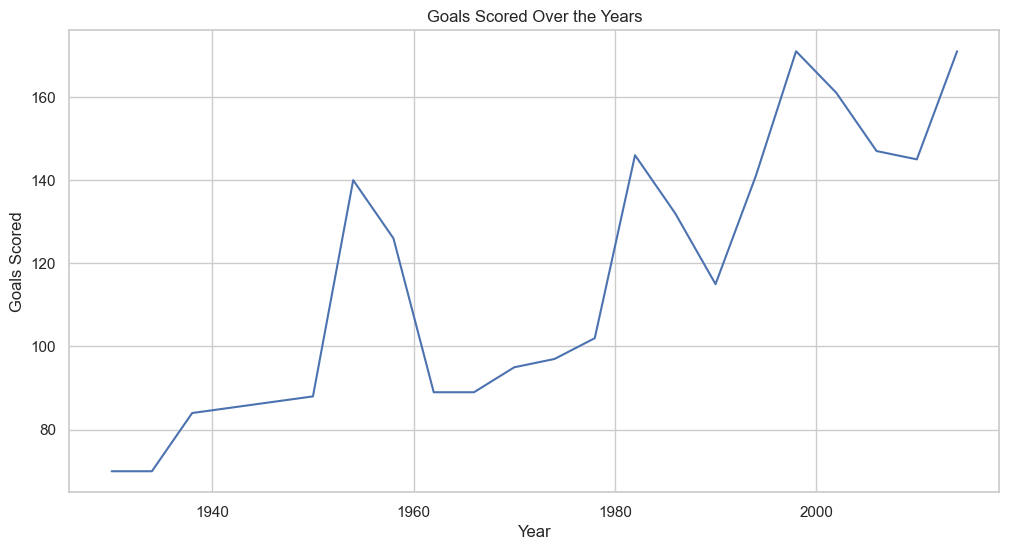

In [9]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=worldcups, x='Year', y='GoalsScored')
plt.title('Goals Scored Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.show()

Attendance Over the Years

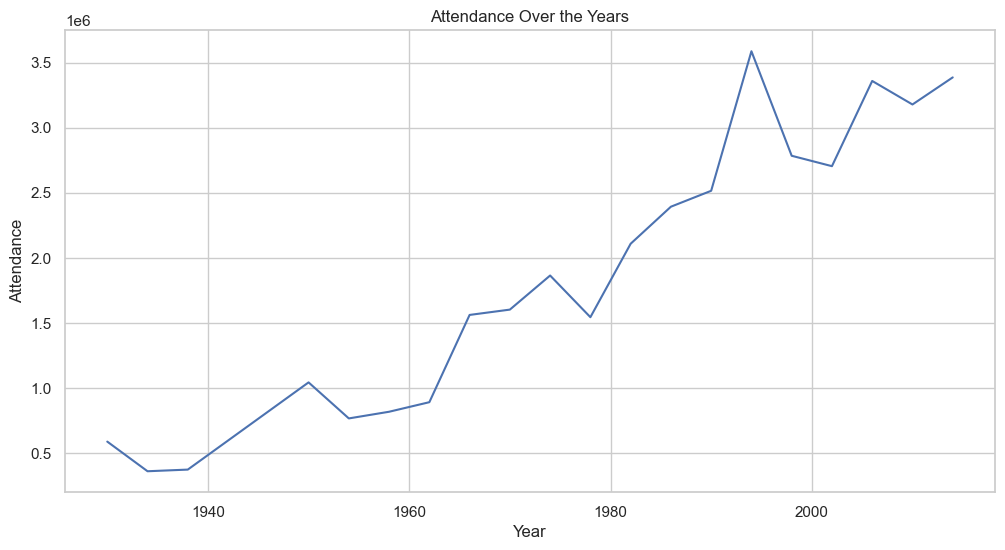

In [10]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=worldcups, x='Year', y='Attendance')
plt.title('Attendance Over the Years')
plt.xlabel('Year')
plt.ylabel('Attendance')
plt.show()



Number of Qualified Teams Over the Years

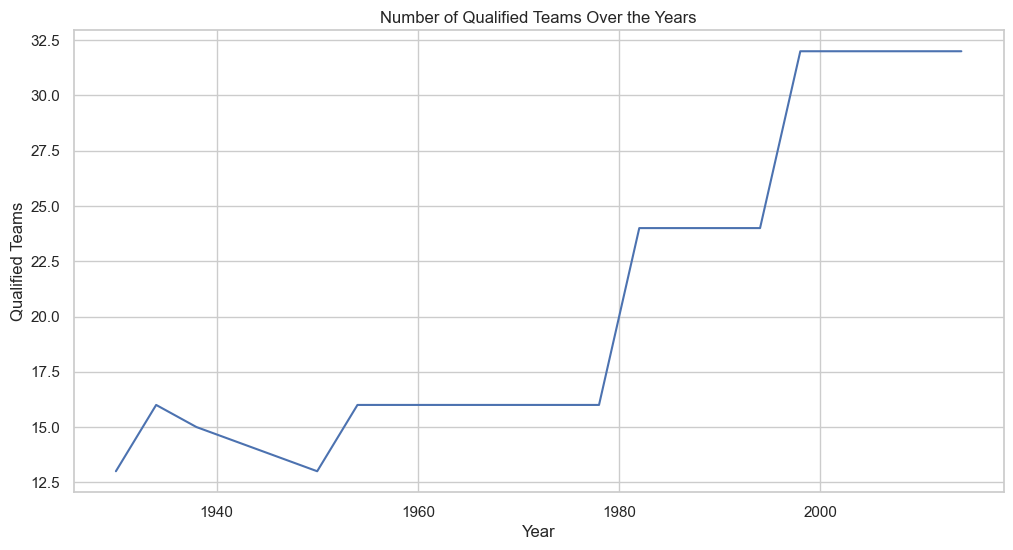

In [11]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=worldcups, x='Year', y='QualifiedTeams')
plt.title('Number of Qualified Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Qualified Teams')
plt.show()

Number of Matches Played Over the Years

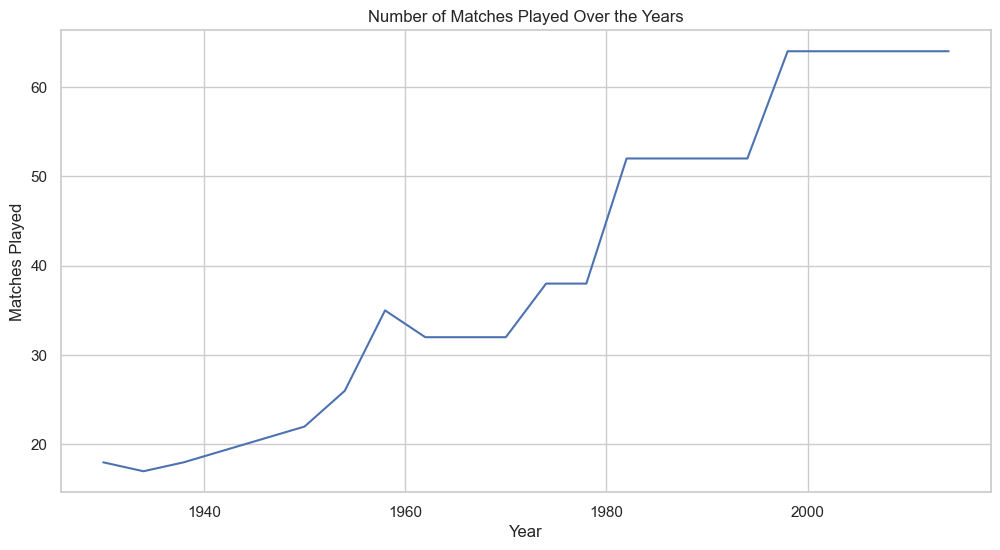

In [12]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=worldcups, x='Year', y='MatchesPlayed')
plt.title('Number of Matches Played Over the Years')
plt.xlabel('Year')
plt.ylabel('Matches Played')
plt.show()

Plots for WorldCupMatches DataSet

In [13]:
# Convert 'Datetime' to datetime format
matches['Datetime'] = pd.to_datetime(matches['Datetime'], errors='coerce')

matches['Total Goals'] = matches['Home Team Goals'] + matches['Away Team Goals']
avg_goals_per_match = matches.groupby('Year')['Total Goals'].mean().reset_index()

Plot average goals per match over the years

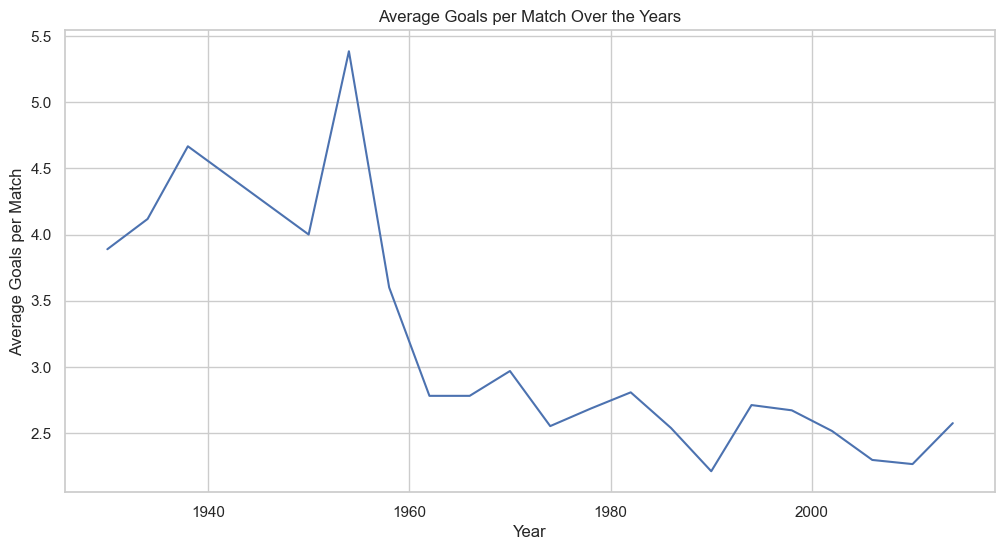

In [14]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=avg_goals_per_match, x='Year', y='Total Goals')
plt.title('Average Goals per Match Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Goals per Match')
plt.show()

Distribution of goals in matches

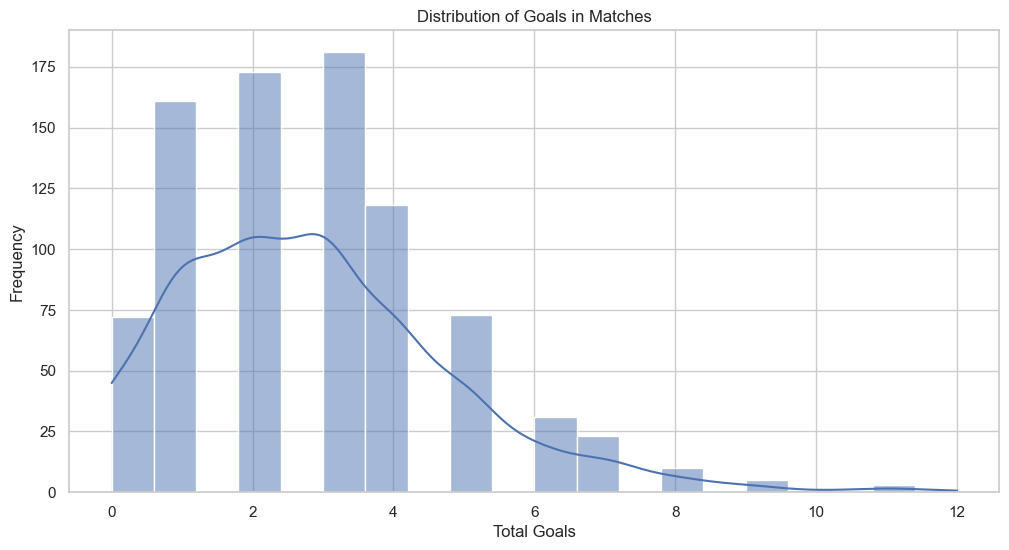

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(matches['Total Goals'], bins=20, kde=True)
plt.title('Distribution of Goals in Matches')
plt.xlabel('Total Goals')
plt.ylabel('Frequency')
plt.show()

Goals by Stage

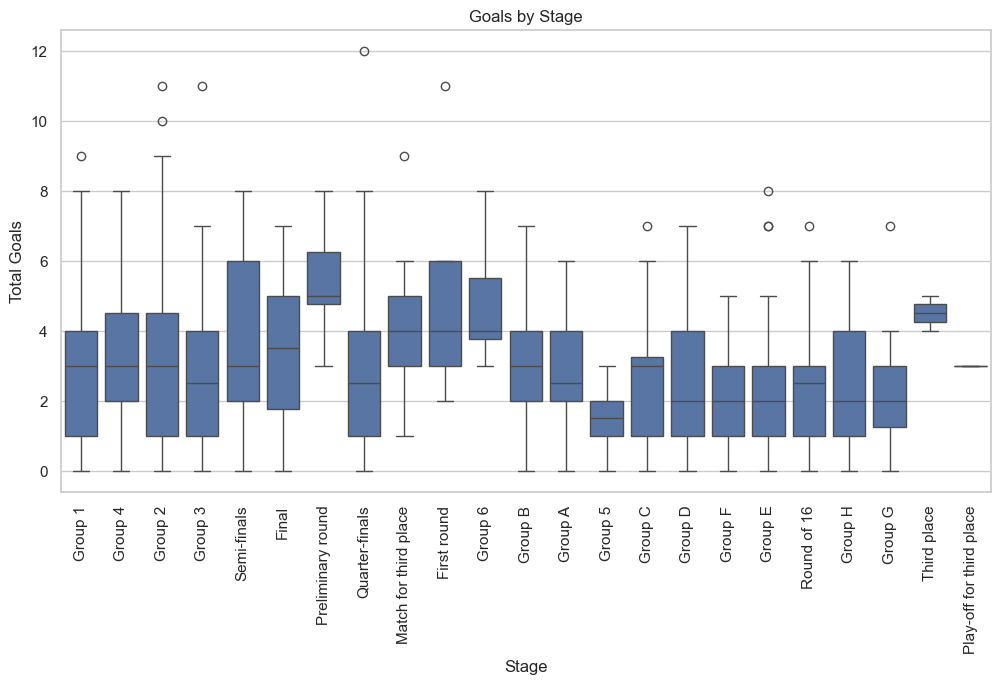

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=matches, x='Stage', y='Total Goals')
plt.title('Goals by Stage')
plt.xlabel('Stage')
plt.ylabel('Total Goals')
plt.xticks(rotation=90)
plt.show()

Attendance by Year

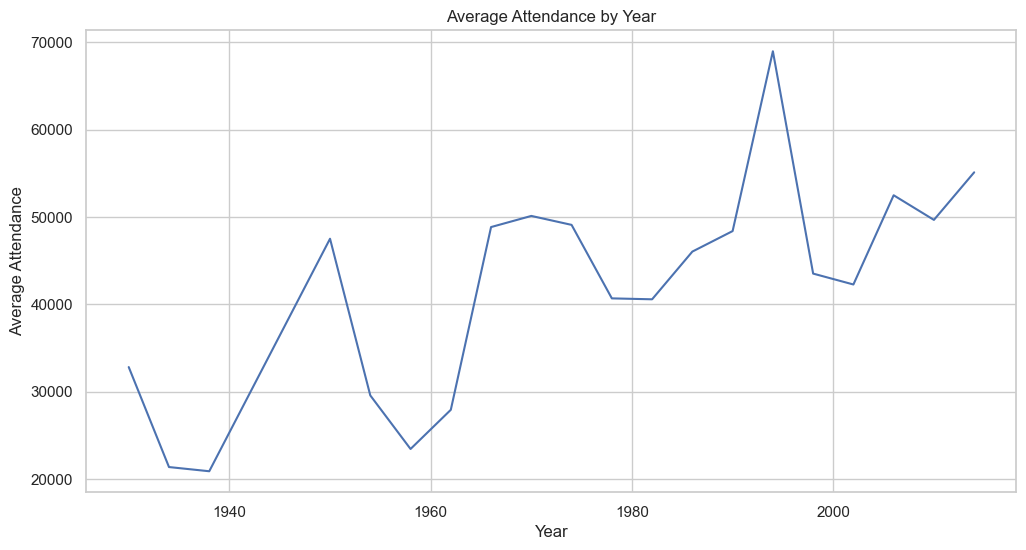

In [17]:

plt.figure(figsize=(12, 6))
sns.lineplot(data=matches.groupby('Year')['Attendance'].mean().reset_index(), x='Year', y='Attendance')
plt.title('Average Attendance by Year')
plt.xlabel('Year')
plt.ylabel('Average Attendance')
plt.show()


Plots for WorldCupPlayers DataSet

Participation by Country

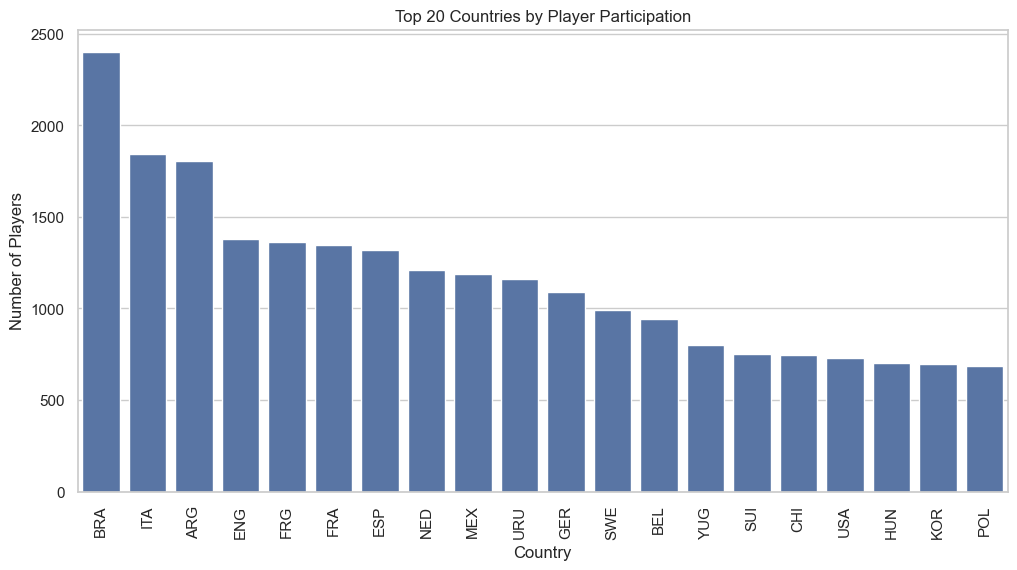

In [18]:
plt.figure(figsize=(12, 6))
country_participation = players['Team Initials'].value_counts().head(20)
sns.barplot(x=country_participation.index, y=country_participation.values)
plt.title('Top 20 Countries by Player Participation')
plt.xlabel('Country')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()

Positions of Players

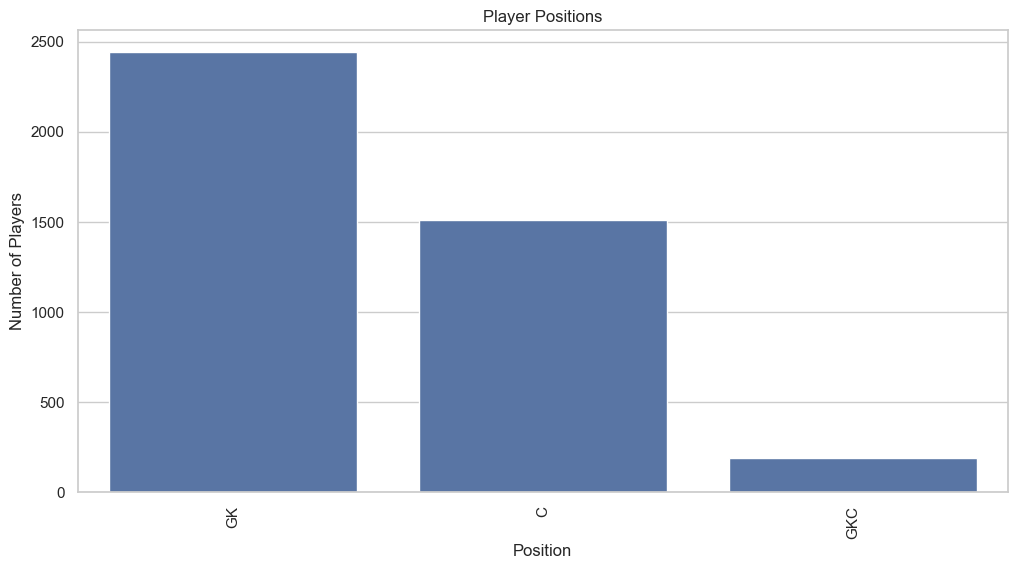

In [19]:
plt.figure(figsize=(12, 6))
position_counts = players['Position'].value_counts()
sns.barplot(x=position_counts.index, y=position_counts.values)
plt.title('Player Positions')
plt.xlabel('Position')
plt.ylabel('Number of Players')
plt.xticks(rotation=90)
plt.show()



Combined Insights

Goals scored by winning teams

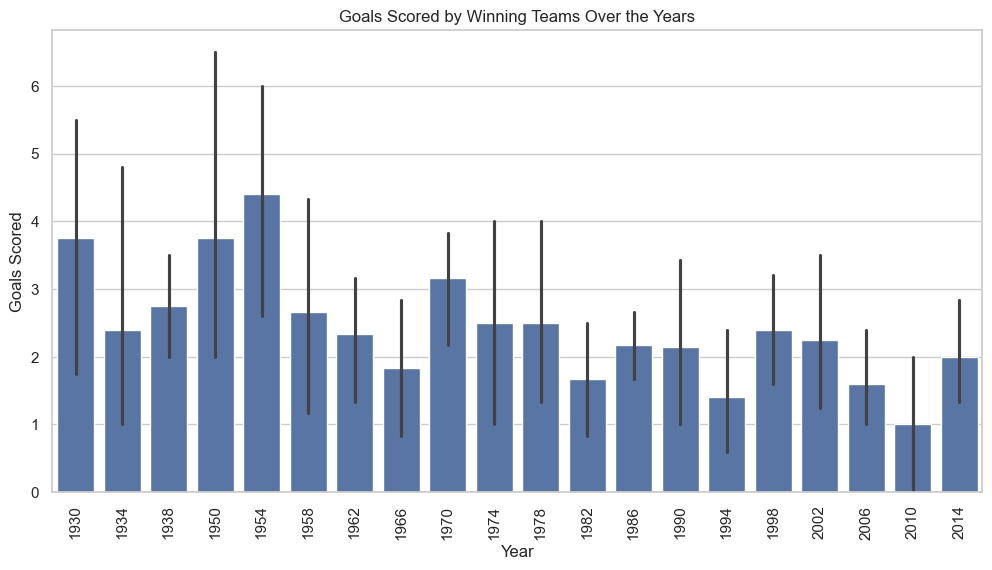

In [20]:
winning_teams = worldcups[['Year', 'Winner', 'GoalsScored']]
winning_team_goals = pd.merge(winning_teams, matches, left_on=['Year', 'Winner'], right_on=['Year', 'Home Team Name'])
winning_team_goals['Winning Team Goals'] = winning_team_goals['Home Team Goals']

plt.figure(figsize=(12, 6))
sns.barplot(data=winning_team_goals, x='Year', y='Winning Team Goals')
plt.title('Goals Scored by Winning Teams Over the Years')
plt.xlabel('Year')
plt.ylabel('Goals Scored')
plt.xticks(rotation=90)
plt.show()

Comparison of Home and Away Goals

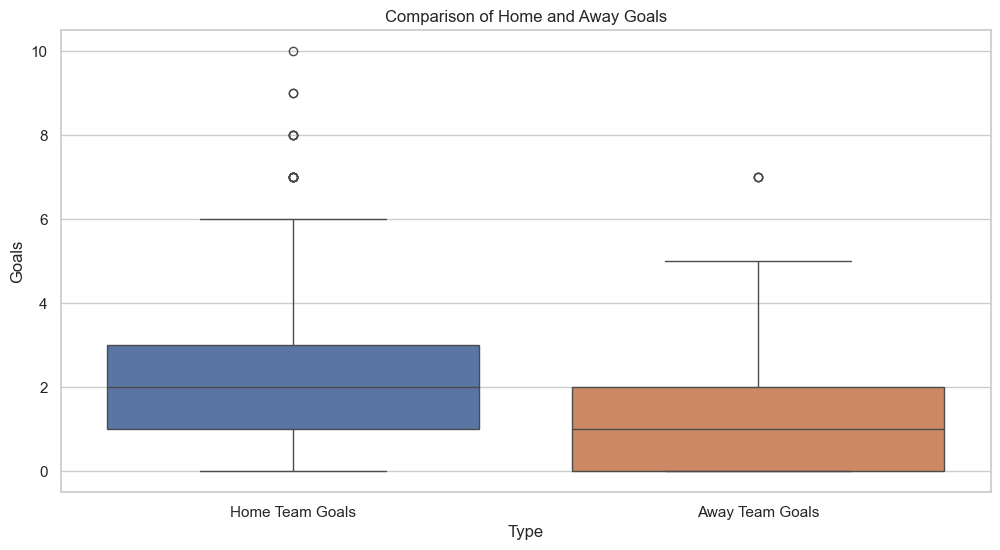

In [21]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=matches[['Home Team Goals', 'Away Team Goals']])
plt.title('Comparison of Home and Away Goals')
plt.xlabel('Type')
plt.ylabel('Goals')
plt.xticks([0, 1], ['Home Team Goals', 'Away Team Goals'])
plt.show()


Stadium with the highest attendance

C:\Users\anjan\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


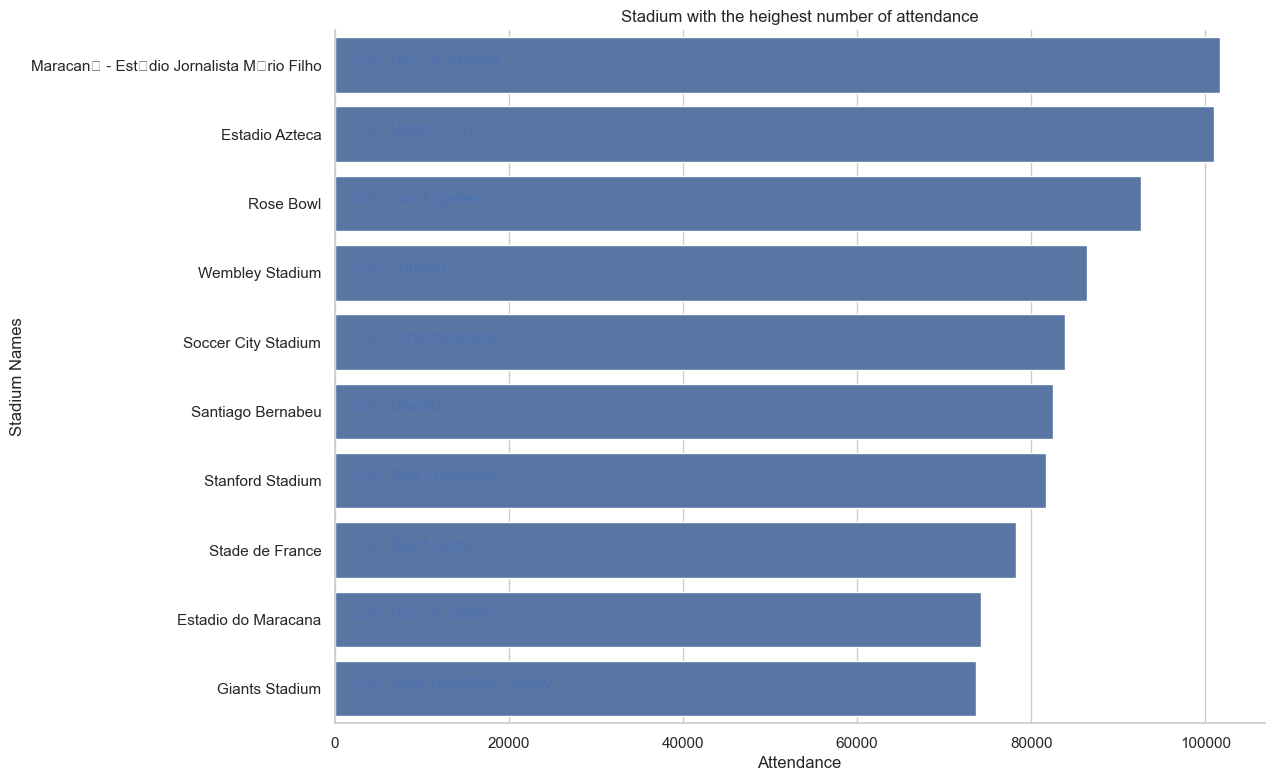

In [22]:
matches['Year'] = matches['Year'].astype(int)

std = matches.groupby(['Stadium', 'City'])['Attendance'].mean().reset_index().sort_values(by = 'Attendance', ascending =False)

top10 = std[:10]

plt.figure(figsize = (12,9))
ax = sns.barplot(y = top10['Stadium'], x = top10['Attendance'])
sns.despine(right = True)

plt.ylabel('Stadium Names')
plt.xlabel('Attendance')
plt.title('Stadium with the heighest number of attendance')
for i, s in enumerate("City: " + top10['City']):
        ax.text(2000, i, s, fontsize = 12, color = 'b')
        
plt.show()

Model for predicting win probability of the Home Team

In [23]:
matches['HomeTeamWon'] = (matches['Home Team Goals'] > matches['Away Team Goals']).astype(int)
features=['Home Team Goals', 'Away Team Goals']
X = matches[features]
y = matches['HomeTeamWon']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion_mat = confusion_matrix(y_test, y_pred)

print("\nConfusion Matrix:\n", confusion_mat)

home_team_goals = int(input("Enter the home team goals"))
away_team_goals = int(input("Enter the away team goals"))
total_goals = home_team_goals + away_team_goals

probability_home_team_wins = clf.predict_proba([[home_team_goals, away_team_goals]])[0][1]
adjusted_probability = home_team_goals / total_goals

print(" Probability of a Home Team Winning:", adjusted_probability)


Confusion Matrix:
 [[75  0]
 [ 0 96]]
 Probability of a Home Team Winning: 0.75


C:\Users\anjan\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


Confusion Matrix

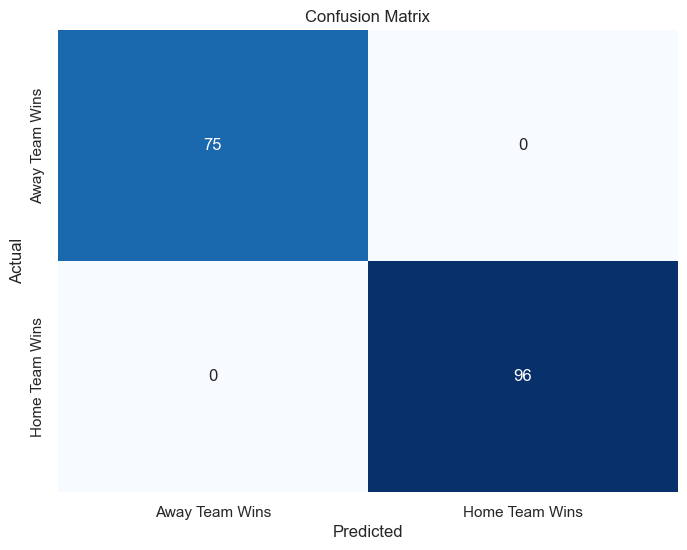

In [24]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Away Team Wins', 'Home Team Wins'], yticklabels=['Away Team Wins', 'Home Team Wins'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()